## Business problem
The leadership team at your company is making goals for 2023 and wants to
understand how much revenue each of the product subscriptions, basic and  expert ,
are generating each month. More specifically, they want to understand the
distribution of monthly revenue across the past year, 2022.

They've asked you the following questions:
1. How much revenue does each product usually generate each month?
2. Which product had the most success throughout all of last year? 
3. Did either product fluctuate greatly each month or was the month-to-month trend fairly consistent?

Since the request is for a board meeting tomorrow, you decide that a granular report
of monthly revenue by product probably isn't the best deliverable, because a large
table of numbers isn't great for gleaning quick insights. Instead, you decide to
calculate something more high-level: the minimum, maximum, average, and
standard deviation of monthly revenue for each product for the year 2022. This will
equip leadership with a quick summary of the revenue and consistency that each
product provided last year.

With this tight of a deadline, you know you've got to get to work!

#Task:
Using a CTE and the subscriptions and products tables, calculate the:

    -minimum monthly revenue: min_rev
    -maximum monthly revenue: max_rev
    -average monthly revenue: avg_rev
    -standard deviation of monthly revenue: std_dev_rev

for each product, ProductName .


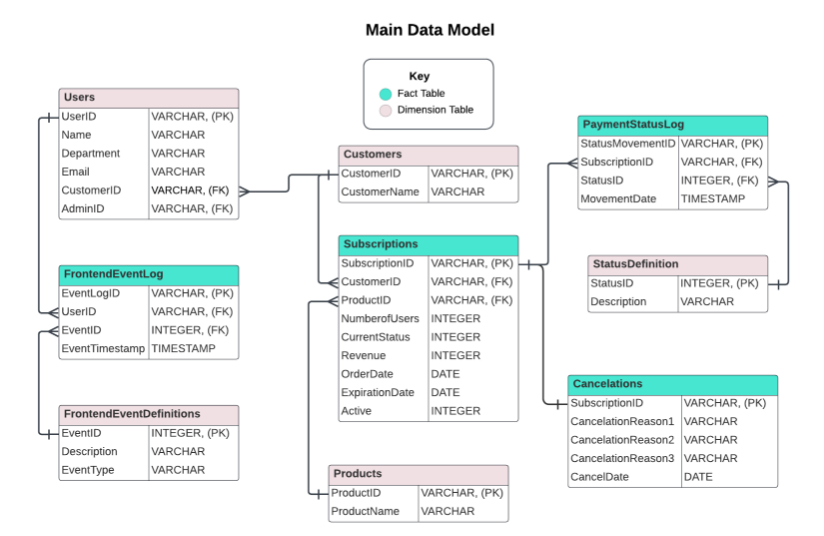

In [ ]:
--calculating the monthly revenue by productname in a CTE
-- using productname instead of productid so that the output is more user friendly
with monthly_revenue as (
select p.productname, 
        sum(s.REVENUE) as mon_rev, 
        date_trunc('month', s.orderdate) as month -- date_trunc to truncate the dates monthly
from products as p
    left join subscriptions as s
    on s.productid = p.productid
where s.orderdate between '2022-01-01' and '2022-12-31' -- only suscriptions placed in 2022
group by p.productname, month
)
 -- calculating the descriptive statistics in a separate statement
select productname, 
    min (mon_rev) as min_rev,
    max(mon_rev) as max_rev,
    avg(mon_rev) as avg_rev,
    stddev(mon_rev) as std_dev_rev
from monthly_revenue
group by productname;

# Here is the output:

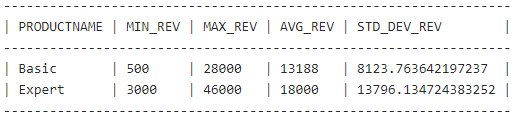